<a href="https://colab.research.google.com/github/Jayjake1/MachineLearningProjects/blob/main/Copy_of_Self_Project_Insurance_Decisioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

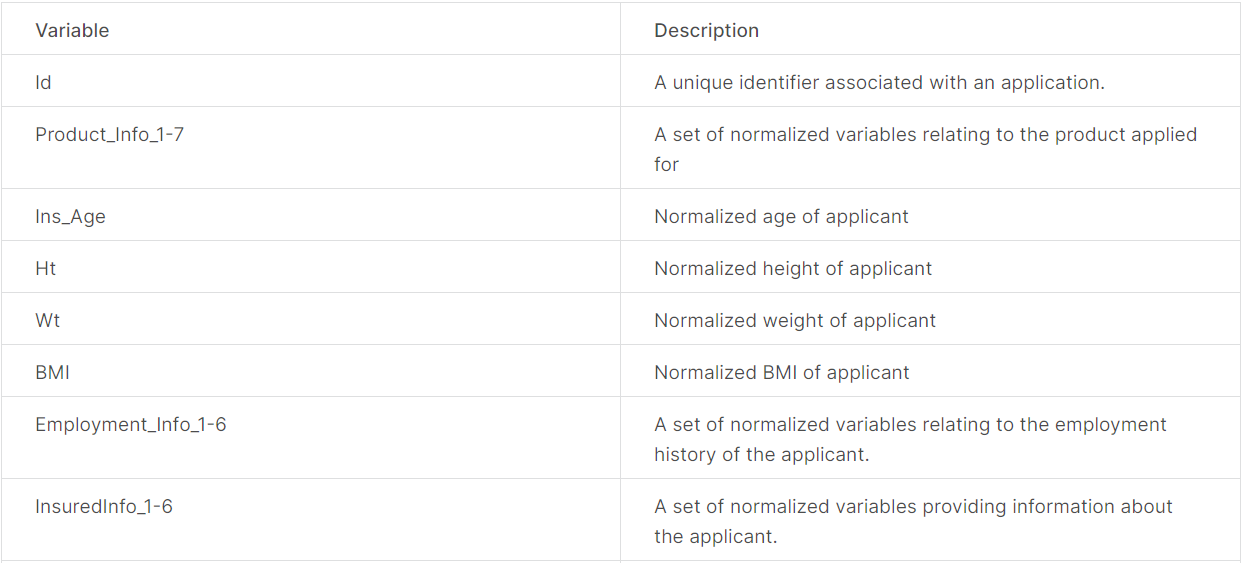

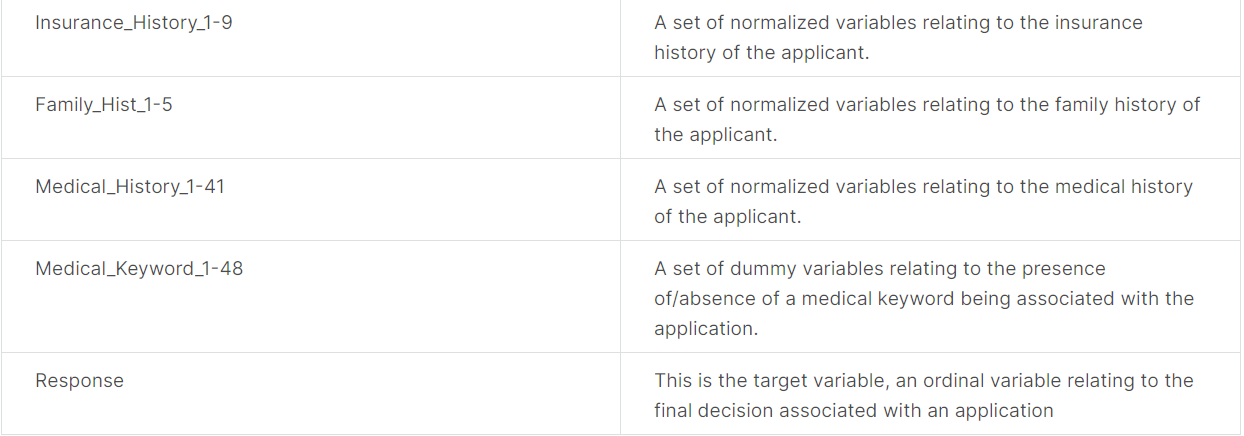

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [3]:
# connecting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_path = "/content/drive/MyDrive/Almabetter/MachineLearning_Supervised/train.csv"
insurance_df = pd.read_csv(df_path,index_col='Id')

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [7]:
insurance_df.tail()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,0.020,1,3,0.00000,3,0.025,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.217391,NaN,0.197183,NaN,0.0,261,2,1,1,3,2,2,2,NaN,3,2,3,3,32.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,0.100,9,1,0.00001,2,0.350,1,2,3,3,1,1,1,2,1,3,2,0.000267,1,3,2,3,0.565217,NaN,0.478873,NaN,24.0,491,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,0.035,9,1,0.00000,2,NaN,1,2,6,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.173913,NaN,0.126761,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,1,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8
79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,0.038,9,1,NaN,3,NaN,1,2,3,3,1,2,1,2,1,1,3,NaN,3,2,3,2,NaN,0.372549,0.704225,NaN,0.0,16,2,1,1,3,2,2,2,NaN,3,2,1,3,240.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8
79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,0.382845,0.539563,0.123,9,1,NaN,2,0.300,1,2,6,3,1,1,1,2,1,1,3,NaN,3,2,3,2,NaN,0.401961,NaN,0.589286,NaN,162,3,1,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,8.0,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0

In [8]:
insurance_df.shape

(59381, 127)

In [9]:
insurance_df.info

<bound method DataFrame.info of        Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                     
2                   1             D3              10        0.076923   
5                   1             A1              26        0.076923   
6                   1             E1              26        0.076923   
7                   1             D4              10        0.487179   
8                   1             D2              26        0.230769   
...               ...            ...             ...             ...   
79142               1             D1              10        0.230769   
79143               1             D3              26        0.230769   
79144               1             E1              26        0.076923   
79145               1             D2              10        0.230769   
79146               1             A8              26        0.076923   

       Product_Info_5  Product_

In [10]:
insurance_df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2

### Exploring the dependent variable

In [11]:
list(insurance_df.columns)[-1]

'Response'

In [12]:
insurance_df['Response'].value_counts() # gives the count of specific value
# with this we can find the response column is in ordinal nature which we can confirm as there are order from 1-8

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [13]:
insurance_df['Response'].isnull() # shows info of whole column using Bool

Id
2        False
5        False
6        False
7        False
8        False
         ...  
79142    False
79143    False
79144    False
79145    False
79146    False
Name: Response, Length: 59381, dtype: bool

In [14]:
insurance_df["Response"].isnull().sum() #gives number of null, if any

0

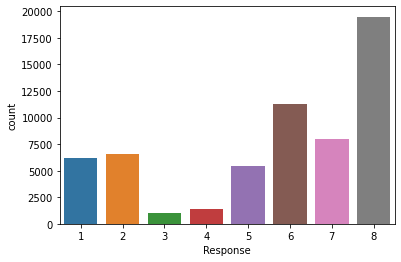

In [15]:
sns.countplot(x=insurance_df['Response'])

### Converting dependent variable to a binary variable(two possible labels/classes)

Here we are clubbing the 1-7 into one variable & 8 to another variable. so that we can have two variable(binary) which help us in result.


In [16]:
def modified_result(row):
  if (row['Response']<= 7 & row['Response']>=0):
    val = 0
  elif (row['Response']==8):
    val = 1
  else:
    val = -1

  return val      

In [17]:
insurance_df['Modified_Response'] = insurance_df.apply(modified_result,axis = 1)

In [18]:
insurance_df['Modified_Response'].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

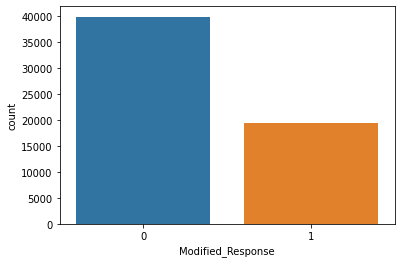

In [19]:
sns.countplot(x=insurance_df['Modified_Response'])
# as we have 8 categories we made the in two groups

In [20]:
insurance_df.drop('Response',axis=1,inplace=True) # dropping column as we have a modified column


In [21]:
insurance_df.columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Modified_Response'],
      dtype='object', length=127)

In [22]:
for i in range(1,49):
  print(insurance_df[f'Medical_Keyword_{i}'].value_counts())

0    56887
1     2494
Name: Medical_Keyword_1, dtype: int64
0    58850
1      531
Name: Medical_Keyword_2, dtype: int64
0    56455
1     2926
Name: Medical_Keyword_3, dtype: int64
0    58517
1      864
Name: Medical_Keyword_4, dtype: int64
0    58869
1      512
Name: Medical_Keyword_5, dtype: int64
0    58633
1      748
Name: Medical_Keyword_6, dtype: int64
0    58555
1      826
Name: Medical_Keyword_7, dtype: int64
0    58763
1      618
Name: Medical_Keyword_8, dtype: int64
0    58986
1      395
Name: Medical_Keyword_9, dtype: int64
0    57216
1     2165
Name: Medical_Keyword_10, dtype: int64
0    55936
1     3445
Name: Medical_Keyword_11, dtype: int64
0    58787
1      594
Name: Medical_Keyword_12, dtype: int64
0    59027
1      354
Name: Medical_Keyword_13, dtype: int64
0    58915
1      466
Name: Medical_Keyword_14, dtype: int64
0    48071
1    11310
Name: Medical_Keyword_15, dtype: int64
0    58626
1      755
Name: Medical_Keyword_16, dtype: int64
0    58837
1      544
Name: Medic

In [23]:
insurance_df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0

In [24]:
insurance_df['Employment_Info_1'].isnull().sum()

19

In [25]:
insurance_df.corr()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Product_Info_1,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,-0.037130,0.047371,0.032271,-0.039832,0.008507,-0.018840,0.011871,-0.041654,0.002911,0.002709,-0.047523,0.013376,-0.047975,0.011357,0.013058,0.007242,-0.008187,0.015076,0.010613,0.006753,0.012547,0.008191,-0.001294,-0.054089,-0.017769,-0.056415,-0.013988,0.022124,0.005200,-0.017654,-0.022528,0.005489,0.008830,-0.000740,-0.002164,0.002007,-0.155339,-0.001493,-0.004357,0.007037,0.003845,-0.030431,0.006451,0.004598,0.001497,-0.009154,0.008965,0.001156,-0.004913,0.034479,-0.020301,-0.020741,0.022710,0.012216,-0.009307,0.004215,-0.007327,-0.007955,0.040738,-0.055632,-0.024576,-0.005298,-0.025444,-0.008999,0.012726,0.022837,-0.004703,0.015176,-0.013485,0.003356,-0.021427,-0.008578,0.005124,-0.001615,0.019955,0.000738,-0.005704,-0.002277,0.010436,0.004590,-0.001816,0.000856,-0.036699,-0.002719,-0.000372,0.008864,-0.007173,0.004998,0.007143,0.001019,0.055918,-0.001985,-0.018417,0.004536,-0.005395,-0.004660,-0.008189,-0.008202,-0.008154,0.002827,-0.006149,0.001988,-0.003620,-0.004441,0.007081,-0.007272,0.002378,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,-0.019621
Product_Info_3,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,0.083288,0.151442,0.191771,-0.241939,-0.026332,-0.764707,-0.005204,-0.033652,0.019398,-0.004991,-0.056197,0.026939,-0.398228,0.029694,0.009949,0.010795,0.033448,-0.022591,0.020219,-0.038518,0.038793,-0.032734,0.020843,-0.010492,0.010921,-0.001724,0.006095,0.009945,-0.033661,-0.041289,-0.090907,-0.004510,-0.045986,-0.005644,-0.006406,0.027212,0.024096,0.005088,-0.001422,0.055416,0.004776,-0.015096,0.009401,-0.003260,-0.018012,-0.071991,0.046969,-0.0

### dropping null values more than 40% nulls

If a column contains more than 40% null they dont any value

In [26]:
more_null_value_col=insurance_df.isnull().sum()/len(insurance_df)
print(more_null_value_col[more_null_value_col>0.4].sort_values(ascending=True))

Insurance_History_5    0.427679
Family_Hist_2          0.482579
Family_Hist_3          0.576632
Family_Hist_5          0.704114
Medical_History_15     0.751015
Medical_History_24     0.935990
Medical_History_32     0.981358
Medical_History_10     0.990620
dtype: float64


In [27]:
pd.set_option('display.max_rows',None)
insurance_df.isnull().sum()

Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
Insurance_History_7        0
Insurance_History_8        0
Insurance_History_9        0
Family_Hist_1              0
Family_Hist_2          28656
Family_Hist_3 

In [28]:
# droping null value columns with greater 40% null
insurance_df=insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)

In [29]:
insurance_df.shape

(59381, 122)

In [30]:
# for i in insurance_df.columns:
#   # sns.countplot(x=insurance_df[i])
#   #define grid with two plots per row
#   g = sns.FacetGrid(data=insurance_df, col=i, col_wrap=5)

# #add histograms to each plot
#   g.map(sns.countplot)

In [31]:
insurance_df['Product_Info_2'].head(20)

Id
2     D3
5     A1
6     E1
7     D4
8     D2
10    D2
11    A8
14    D2
15    D3
16    E1
17    D3
18    D4
19    A2
20    D1
22    D4
23    A7
24    D4
25    D3
26    D3
27    D4
Name: Product_Info_2, dtype: object

In [32]:
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Starting building baseline models(Random Forest Classifier & XGBoost Classifier)

In [33]:
insurance_df.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Modified_Response'],
      dtype='object', length=121)

In [34]:
# Data for all independent variables
X = insurance_df.drop(labels="Modified_Response",axis = 1)

In [35]:
# Data for dependent variable
Y = insurance_df['Modified_Response']

In [36]:
X = X.fillna(X.mean()) # imputing mean, but all ways need to check on this

In [37]:
X.shape, Y.shape

((59381, 120), (59381,))

### Splitting data into train&test split

In [38]:
x_train,x_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 1)

In [39]:
print(x_train.shape,Y_train.shape)
print(x_test.shape,Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


In [40]:
x_train.isnull().sum() # checking for null

Product_Info_1         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_2          0
Family_Hist_3          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0


In [41]:
# number of trees
n_estimators = [50,80,100]

# maximum depth of trees
max_depth = [4,6,8]

#minimum number of samples required to split a node
min_sample_split = [50,100,150]

# minimum number of sample in leaf node
min_sample_leaf = [40,50]

# Hyperparameter grid
param_dict = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_sample_split,
    'min_samples_leaf' : min_sample_leaf
}

In [42]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [43]:
# from sklearn.model_selection import randomforestClassifer
# creating an instance of randomforestClassifer
rf_model = ensemble.RandomForestClassifier()

#GridSearch
rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid = param_dict,
    cv = 5, verbose = 2, scoring ='roc_auc'
)
# model training
rf_grid.fit(x_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  9.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [44]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
# Random forest will perform operation on specified term or percent given
# unlike gridSearch performs more
# Bayesian initial by certain number, it perform that combination

In [46]:
rf_optimal_model = rf_grid.best_estimator_
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [47]:
# making predictions on train test data
train_class_preds = rf_optimal_model.predict(x_train)
test_class_preds = rf_optimal_model.predict(x_test)

# getting the probabilities of train test split
train_preds = rf_optimal_model.predict_proba(x_train)
test_preds = rf_optimal_model.predict_proba(x_test)

In [48]:
len(train_preds)

44535

In [49]:
train_preds.shape

(44535, 2)

In [50]:
train_preds = rf_optimal_model.predict_proba(x_train)[:,1]
test_preds = rf_optimal_model.predict_proba(x_test)[:,1]

In [51]:
train_preds.shape

(44535,)

In [52]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [53]:
# Calculating accuracy for train or test splits
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print(f'The accuracy of train dataset is {train_accuracy}')
print(f'The accuracy for test dataset: {test_accuracy}')

The accuracy of train dataset is 0.8094756932749523
The accuracy for test dataset: 0.8027078000808299


In [54]:
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds)
train_cm

array([[27102,  2805],
       [ 5680,  8948]])

In [55]:
test_cm

array([[9019,  966],
       [1963, 2898]])

In [56]:
#precision
# TP/(TP+FP)
prescision=2851/(2851+956)
#[TN,FP]
#[FN,TP]
# Recall - TP/(FN+TP)
recall = 2851/(2010+2851)

In [57]:
train_auc = roc_auc_score(Y_train,train_preds)
test_auc = roc_auc_score(Y_test,test_preds)

In [58]:
train_auc

0.8918618389690567

In [59]:
test_auc

0.8851351497519885

In [60]:
x_train.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=120)

In [61]:
rf_optimal_model.feature_importances_

array([3.28092238e-04, 3.62180727e-03, 3.62717498e-02, 0.00000000e+00,
       2.01415457e-04, 3.35297423e-05, 1.96111713e-02, 1.31709427e-02,
       1.60612732e-01, 2.47285822e-01, 2.63322143e-03, 1.99484245e-03,
       4.54911495e-04, 5.16036047e-04, 1.64914393e-03, 2.09978062e-03,
       5.38737671e-03, 1.13365404e-03, 5.52173974e-04, 3.06966126e-04,
       1.21953987e-03, 3.76866598e-02, 2.22855133e-03, 1.35052141e-04,
       5.52895193e-04, 2.32384354e-04, 6.88092466e-04, 2.06094545e-03,
       3.72911542e-04, 2.84384230e-04, 2.38000859e-04, 3.47715626e-03,
       2.00059328e-02, 5.54431240e-03, 1.58558102e-02, 7.33787959e-03,
       1.36728139e-03, 4.23215653e-04, 1.02927357e-01, 1.21132303e-04,
       3.78727495e-03, 2.83856534e-06, 3.87101944e-04, 4.91389611e-04,
       0.00000000e+00, 2.28216298e-05, 2.05989381e-03, 1.13794255e-05,
       6.21504590e-03, 3.03006786e-04, 1.26366222e-04, 2.00177983e-05,
       4.60564775e-04, 3.06925029e-04, 2.83157466e-05, 9.21858351e-02,
      

In [62]:
pip install shap

     |████████████████████████████████| 371 kB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509241 sha256=8f22ee09b5e34bd35ed934c21e6487484c9371462e3460ca04bd9edde50b22c3
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [63]:
importances = rf_optimal_model.feature_importances_
importance_dict = {"feature":list(x_train.columns),
                   'Feature Importance':importances}

In [64]:
importance_dict

{'Feature Importance': array([3.28092238e-04, 3.62180727e-03, 3.62717498e-02, 0.00000000e+00,
        2.01415457e-04, 3.35297423e-05, 1.96111713e-02, 1.31709427e-02,
        1.60612732e-01, 2.47285822e-01, 2.63322143e-03, 1.99484245e-03,
        4.54911495e-04, 5.16036047e-04, 1.64914393e-03, 2.09978062e-03,
        5.38737671e-03, 1.13365404e-03, 5.52173974e-04, 3.06966126e-04,
        1.21953987e-03, 3.76866598e-02, 2.22855133e-03, 1.35052141e-04,
        5.52895193e-04, 2.32384354e-04, 6.88092466e-04, 2.06094545e-03,
        3.72911542e-04, 2.84384230e-04, 2.38000859e-04, 3.47715626e-03,
        2.00059328e-02, 5.54431240e-03, 1.58558102e-02, 7.33787959e-03,
        1.36728139e-03, 4.23215653e-04, 1.02927357e-01, 1.21132303e-04,
        3.78727495e-03, 2.83856534e-06, 3.87101944e-04, 4.91389611e-04,
        0.00000000e+00, 2.28216298e-05, 2.05989381e-03, 1.13794255e-05,
        6.21504590e-03, 3.03006786e-04, 1.26366222e-04, 2.00177983e-05,
        4.60564775e-04, 3.06925029e-04, 2.

In [65]:
importance_df = pd.DataFrame(importance_dict)

In [66]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],5)
importance_df.head()

,feature,Feature Importance
0,Product_Info_1,0.00033
1,Product_Info_3,0.00362
2,Product_Info_4,0.03627
3,Product_Info_5,0.00000
4,Product_Info_6,0.00020


In [67]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,feature,Feature Importance
9,BMI,0.24729
8,Wt,0.16061
86,Medical_Keyword_15,0.11638
38,Medical_History_4,0.10293
55,Medical_History_23,0.09219
21,InsuredInfo_6,0.03769
2,Product_Info_4,0.03627
32,Family_Hist_2,0.02001
6,Ins_Age,0.01961
74,Medical_Keyword_3,0.01805


## SHAP model for finding most relevant variables
Advantages of SHAP :

The method is solidly grounded in mathematics and game theory so we can be certain that it is unbiased (in the statistical sense).

Disadvantages of SHAP :

Computational inefficiency. There are 2k possible coalitions for the given number of k factors so depending on the number of variables the analyst must use a different level of simplification assumptions. However, on the contrary, SHAP has a fast implementation for tree-based models.

In [68]:
pip install lightgbm

In [69]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb_model
import shap 
import graphviz
sns.set_style('darkgrid') 

In [70]:
shap.initjs()

In [71]:
x_shap = x_train
explainer = shap.TreeExplainer(rf_optimal_model)
shap_values = explainer.shap_values(x_shap)

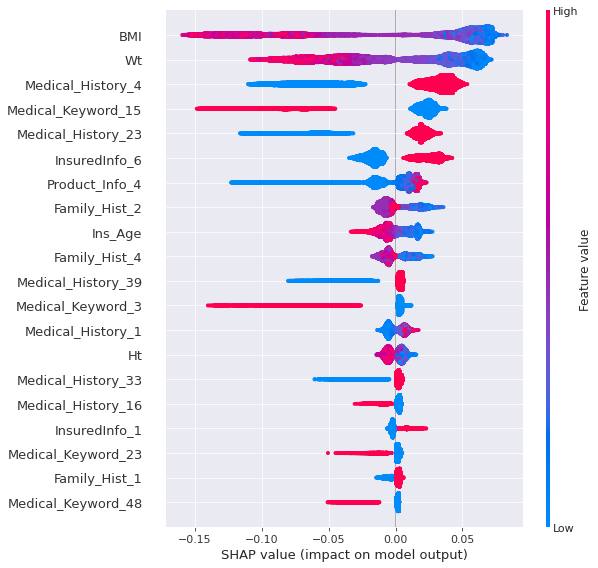

In [72]:
# shap contains mainly three types of plots
shap.summary_plot(shap_values[1],x_shap,plot_type="dot") # red in which high values taken
# -ve value is decreasing model prob of class 1

In [73]:
# feature importance according from test dataset
x_shap = x_test
explainer = shap.TreeExplainer(rf_optimal_model)
shap_values = explainer.shap_values(x_shap)

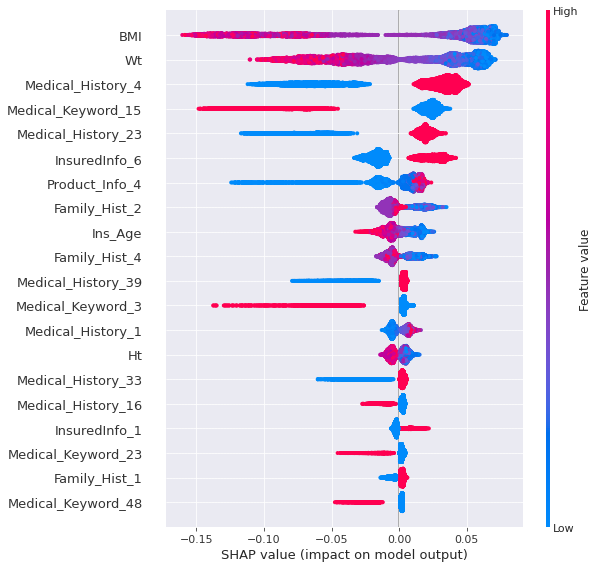

In [74]:
shap.summary_plot(shap_values[1],x_shap,plot_type="dot")

In [83]:
# dependence plots
top_vars = ['BMI','Wt','Medical_Keyword_15','Medical_Keyword_4','InsuredInfo_6']
for ele in top_vars:
  shap.dependence_plot(ele, shap_values[1], x_train)

IndexError: ignored

In [75]:
# X_train1=pd.DataFrame(x_train, columns=["Type_of_Cab","Destination_Type","Trip_Distance","Customer_Since_Months","Customer_Rating","Var3"])
# X_test=pd.DataFrame(X_validation, columns=["Type_of_Cab","Destination_Type","Trip_Distance","Customer_Since_Months","Customer_Rating","Var3"])
# Y_train1=pd.DataFrame(Y_train, columns=["Surge_Pricing_Type"])
# Y_test=pd.DataFrame(Y_validation, columns=["Surge_Pricing_Type"])

NameError: ignored